In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
digits = load_digits()

In [ ]:
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


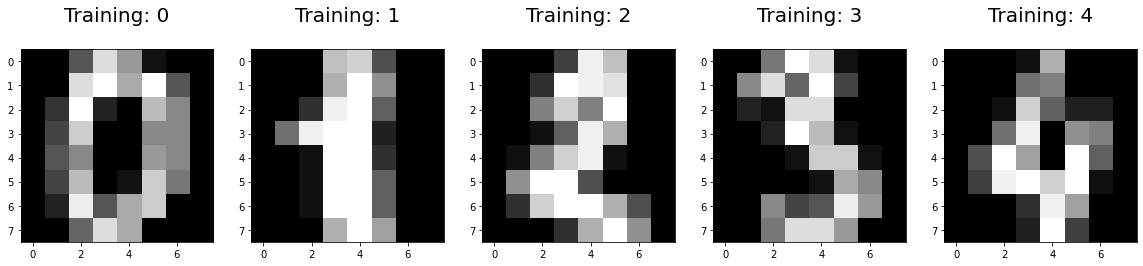

In [ ]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [ ]:
print(x_train.shape)

(1383, 64)


In [ ]:
print(y_train.shape)

(1383,)


In [ ]:
print(x_test.shape)

(414, 64)


In [ ]:
print(y_test.shape)

(414,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [ ]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


In [ ]:
import seaborn as sns

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


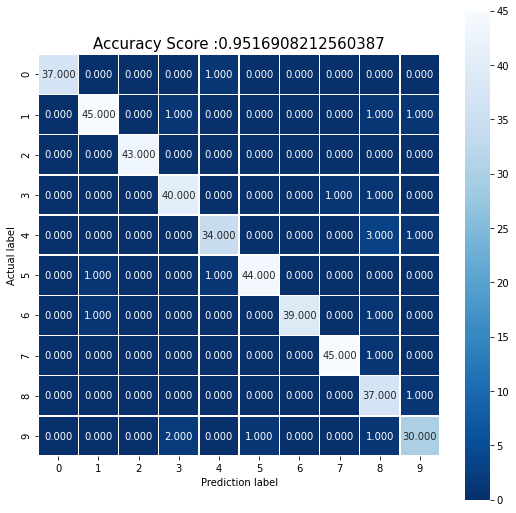

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Prediction label');
all_sample_title = 'Accuracy Score :{0}'.format(score)
plt.title(all_sample_title, size = 15);

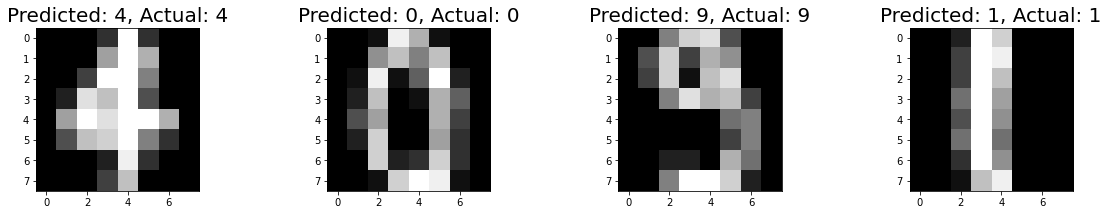

In [ ]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict==actual:
    classifiedIndex.append(index)
  index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4,plotIndex+1)
  plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)
  plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)